# Non-flat arm of three rotary joints

The robotic arm of the following image has three rotational degrees of freedom. The axis of joint 1 is perpendicular to the axis of joint 2. The axes of joints 2 and 3 are parallel. Implement the straight-line kinematics of the planar arm, providing a set of values for the angles of the three joints throughout the range [0, 2𝜋) to scan and draw the workspace in 3D space for the Final Action Element. Take into account the lengths of the joints: 𝑙1 = 0.3, 𝑙2 = 0.10, 𝑙3 = 0.05."

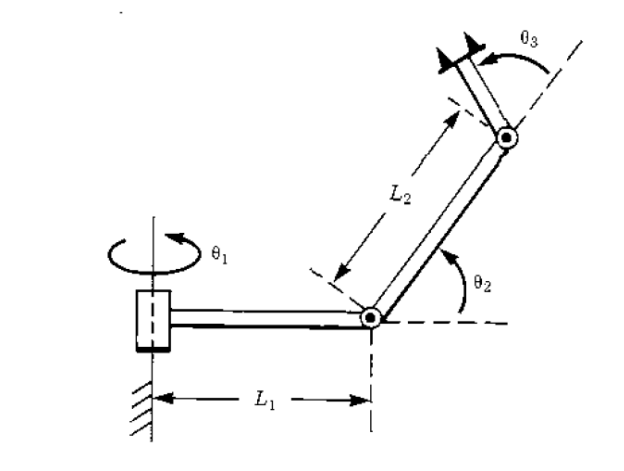

In [25]:
import sympy as sp
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)
from IPython.display import Image
Image('Kinematics_2.png', width = 400)

## Symbols

In [26]:
from sympy.physics.mechanics import dynamicsymbols

In [27]:
theta1, theta2, theta3, l1, l2, l3, theta, alpha, a, d = dynamicsymbols('theta1 theta2 theta3  l1 l2 l3 theta alpha a d')
theta1, theta2, theta3, l1, l2, l3, theta, alpha, a, d 

(theta1, theta2, theta3, l1, l2, l3, theta, alpha, a, d)

## Matrices and Calculations

In [28]:
T = sp.Matrix([[sp.cos(theta), -sp.sin(theta), 0, a],
                 [sp.cos(alpha)*sp.sin(theta), sp.cos(theta)*sp.cos(alpha), -sp.sin(alpha), -sp.sin(alpha)*d],
                 [sp.sin(alpha)*sp.sin(theta), sp.sin(alpha)*sp.cos(theta), sp.cos(alpha), sp.cos(alpha)*d],
                 [0,0,0,1]])
T


Matrix([
[           cos(theta),           -sin(theta),           0,             a],
[sin(theta)*cos(alpha), cos(alpha)*cos(theta), -sin(alpha), -d*sin(alpha)],
[sin(alpha)*sin(theta), sin(alpha)*cos(theta),  cos(alpha),  d*cos(alpha)],
[                    0,                     0,           0,             1]])

In [29]:
T01 = T.subs({alpha:0, a:0, theta:theta1, d:0})
T01


Matrix([
[cos(theta1), -sin(theta1), 0, 0],
[sin(theta1),  cos(theta1), 0, 0],
[          0,            0, 1, 0],
[          0,            0, 0, 1]])

In [30]:
import math

In [31]:

T12 = T.subs({alpha: round(math.radians(90),2), a:l1, theta:theta2, d:0})
T12

Matrix([
[                     cos(theta2),                     -sin(theta2),                    0, l1],
[0.000796326710733263*sin(theta2), 0.000796326710733263*cos(theta2),   -0.999999682931835,  0],
[   0.999999682931835*sin(theta2),    0.999999682931835*cos(theta2), 0.000796326710733263,  0],
[                               0,                                0,                    0,  1]])

In [32]:
T23 = T.subs({alpha:0, a:l2, theta:theta3, d:0})
T23

Matrix([
[cos(theta3), -sin(theta3), 0, l2],
[sin(theta3),  cos(theta3), 0,  0],
[          0,            0, 1,  0],
[          0,            0, 0,  1]])

In [33]:
T34 = T.subs({alpha:0, a:l3, theta:0, d:0})
T34

Matrix([
[1, 0, 0, l3],
[0, 1, 0,  0],
[0, 0, 1,  0],
[0, 0, 0,  1]])

In [34]:
T02 = (T01*T12)
T02

Matrix([
[-0.000796326710733263*sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2), -0.000796326710733263*sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1),  0.999999682931835*sin(theta1), l1*cos(theta1)],
[ sin(theta1)*cos(theta2) + 0.000796326710733263*sin(theta2)*cos(theta1), -sin(theta1)*sin(theta2) + 0.000796326710733263*cos(theta1)*cos(theta2), -0.999999682931835*cos(theta1), l1*sin(theta1)],
[                                          0.999999682931835*sin(theta2),                                           0.999999682931835*cos(theta2),           0.000796326710733263,              0],
[                                                                      0,                                                                       0,                              0,              1]])

In [35]:
T03 = (T02*T23)
T03

Matrix([
[(-0.000796326710733263*sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*cos(theta3) + (-0.000796326710733263*sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1))*sin(theta3), -(-0.000796326710733263*sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*sin(theta3) + (-0.000796326710733263*sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1))*cos(theta3),  0.999999682931835*sin(theta1), (-0.000796326710733263*sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*l2 + l1*cos(theta1)],
[ (-sin(theta1)*sin(theta2) + 0.000796326710733263*cos(theta1)*cos(theta2))*sin(theta3) + (sin(theta1)*cos(theta2) + 0.000796326710733263*sin(theta2)*cos(theta1))*cos(theta3),   (-sin(theta1)*sin(theta2) + 0.000796326710733263*cos(theta1)*cos(theta2))*cos(theta3) - (sin(theta1)*cos(theta2) + 0.000796326710733263*sin(theta2)*cos(theta1))*sin(theta3), -0.999999682931835*cos(theta1),  (sin(theta1)*cos(theta2) + 0.000796326710733263*sin(theta2)*cos(theta1))*l2 + l1*sin(theta1)],
[                              

In [36]:
T04 = (T03*T34)
T04

Matrix([
[(-0.000796326710733263*sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*cos(theta3) + (-0.000796326710733263*sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1))*sin(theta3), -(-0.000796326710733263*sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*sin(theta3) + (-0.000796326710733263*sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1))*cos(theta3),  0.999999682931835*sin(theta1), ((-0.000796326710733263*sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*cos(theta3) + (-0.000796326710733263*sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1))*sin(theta3))*l3 + (-0.000796326710733263*sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*l2 + l1*cos(theta1)],
[ (-sin(theta1)*sin(theta2) + 0.000796326710733263*cos(theta1)*cos(theta2))*sin(theta3) + (sin(theta1)*cos(theta2) + 0.000796326710733263*sin(theta2)*cos(theta1))*cos(theta3),   (-sin(theta1)*sin(theta2) + 0.000796326710733263*cos(theta1)*cos(theta2))*cos(theta3) - (sin(theta1)*cos(theta2) + 0.000796326710733263*sin(theta2)*cos(

## Simplified Matrix and Equations

In [37]:
Tsimplified= sp.Matrix([[T04[0,0].simplify(), T04[0,1].simplify(), T04[0,2].simplify(), T04[0,3].simplify()], 
                        [T04[1,0].simplify(), T04[1,1].simplify(), T04[1,2].simplify(), T04[1,3].simplify()],
                        [T04[2,0].simplify(), T04[2,1].simplify(), T04[2,2].simplify(), T04[2,3].simplify()],
                        [T04[3,0].simplify(), T04[3,1].simplify(), T04[3,2].simplify(), T04[3,3].simplify()]])

Tsimplified

Matrix([
[ 0.499601836644633*cos(-theta1 + theta2 + theta3) + 0.500398163355367*cos(theta1 + theta2 + theta3), -0.499601836644633*sin(-theta1 + theta2 + theta3) - 0.500398163355367*sin(theta1 + theta2 + theta3),  0.999999682931835*sin(theta1),      -(0.000796326710733153*sin(theta2 + theta3)*sin(theta1) - 1.0*cos(theta2 + theta3)*cos(theta1))*l3 - (0.000796326710733263*sin(theta1)*sin(theta2) - cos(theta1)*cos(theta2))*l2 + l1*cos(theta1)],
[-0.499601836644633*sin(-theta1 + theta2 + theta3) + 0.500398163355367*sin(theta1 + theta2 + theta3), -0.499601836644633*cos(-theta1 + theta2 + theta3) + 0.500398163355367*cos(theta1 + theta2 + theta3), -0.999999682931835*cos(theta1), (sin(theta1)*cos(theta2) + 0.000796326710733263*sin(theta2)*cos(theta1))*l2 - (0.499601836644633*sin(-theta1 + theta2 + theta3) - 0.500398163355367*sin(theta1 + theta2 + theta3))*l3 + l1*sin(theta1)],
[                                                             0.999999682931835*sin(theta2 + theta3),                  

In [38]:
px = Tsimplified[0,3]
px

-(0.000796326710733153*sin(theta2 + theta3)*sin(theta1) - 1.0*cos(theta2 + theta3)*cos(theta1))*l3 - (0.000796326710733263*sin(theta1)*sin(theta2) - cos(theta1)*cos(theta2))*l2 + l1*cos(theta1)

In [39]:
py = Tsimplified[1,3]
py

(sin(theta1)*cos(theta2) + 0.000796326710733263*sin(theta2)*cos(theta1))*l2 - (0.499601836644633*sin(-theta1 + theta2 + theta3) - 0.500398163355367*sin(theta1 + theta2 + theta3))*l3 + l1*sin(theta1)

In [40]:
fx = sp.lambdify((l1, l2, l3, theta1, theta2, theta3), px, 'numpy')
fy = sp.lambdify((l1, l2, l3, theta1, theta2, theta3), py, 'numpy')

## Plots

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d2r = np.deg2rad

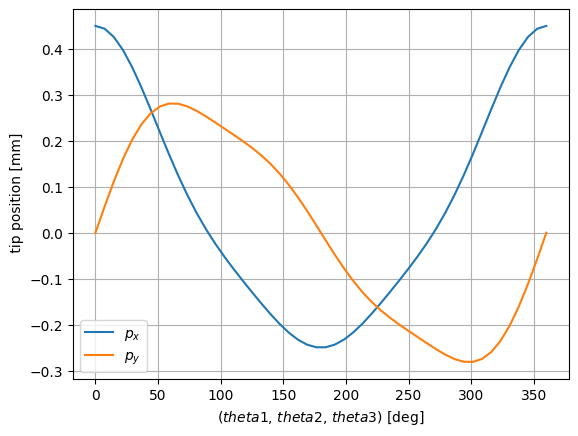

In [42]:
theta1s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 1
theta2s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 2
theta3s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 3

zx = np.array(fx(0.3, 0.10, 0.05, theta1s, theta2s, theta3s))
zy = np.array(fy(0.3, 0.10, 0.05, theta1s, theta2s, theta3s))
fig, ax1 = plt.subplots()
ax1.plot(np.rad2deg(theta1s), zx, label = r'$p_x$')
ax1.plot(np.rad2deg(theta1s), zy, label = r'$p_y$')
ax1.set_xlabel(r'($theta1$, $theta2$, $theta3$) [deg]')
ax1.set_ylabel(r' tip position [mm]')
plt.legend()
plt.grid()


In [43]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) # for offline mode in Jupyter Notebook use

import plotly.offline as py
import plotly.graph_objs as go
from numpy import * # Not recommended, but we use to avoid rewriting the forward kinematic equations with prefix 'np'

In [44]:
theta11 = np.linspace(d2r(0), d2r(360))
theta22 = np.linspace(d2r(0), d2r(360))
theta33 = np.linspace(d2r(0), d2r(360))

theta1, theta2 = np.meshgrid(theta11, theta22)
theta2, theta3 = np.meshgrid(theta22, theta33)

l_range = [3]

px1 = {}
py1 = {}
pz1 = {}

for i in l_range:
    l1 = i - 2.7
    l2 = i - 2.9
    l3 = i - 2.95
  

pxa = l3*(cos(theta1)*cos(theta2)*cos(theta3) - sin(theta3)*cos(theta1)*sin(theta2)) + cos(theta1)*cos(theta2)*l2 + cos(theta1)*l1
pya = l3*(sin(theta1)*cos(theta2)*cos(theta3) - sin(theta1)*sin(theta2)*sin(theta3)) + sin(theta1)*cos(theta2)*l2 + sin(theta1)*l1
 
px1['x{0}'.format(i)] = pxa
py1['x{0}'.format(i)] = pya



In [45]:
pxx = px1['x3']
pyy = py1['x3']
pzz = pyy*0

In [46]:
trace1 = go.Surface(z = pzz, x = pyy, y = pxx,
                    colorscale = 'Greens', 
                    showscale = False, 
                    opacity = 0.7,
                   )
data = [trace1]

In [47]:
layout = go.Layout(scene = dict(
                    xaxis = dict(title = 'X (mm)'),
                    yaxis = dict(title = 'Y (mm)'),
                    zaxis = dict(title = 'Z (mm)'),
                    ),
                  )

In [48]:
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)